# Проект по линейной регрессии


## Общее описание:

Предоставлены данные с характеристиками домов (площадь, наличие террасы и т.д.) и ценами их продаж.

На основании данных необходимо осуществить задачу регрессии и построить модель, которая будет прогнозировать цену продажи дома на основании характеристик.


## Описание данных

В датасете 274 столбца.

- `SalePrice` - целевая переменная - цена продажи дома
<br><br>
- остальные столбцы датасета являются признаками, влияющими на цену продажи дома.



### План

**1. Импорт необходимых библиотек и загрузка данных** 

**2. Изучение и обработка данных.**
   
**3. Построение регрессионной модели и оценка ее работы**



<hr style="border:1px solid">

## 1. Импорт необходимых библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/AMES_Final_DF.csv")

In [3]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


<hr style="border:1px solid">

## 2. Изучение и обработка данных

In [38]:
# смотрим на размер данных

df.shape

(2925, 274)

In [39]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2925.0,69.683099,21.344161,0.0,60.0,70.0,80.0,313.0
Lot Area,2925.0,10109.861538,7785.509739,1300.0,7438.0,9430.0,11526.0,215245.0
Overall Qual,2925.0,6.091624,1.406386,1.0,5.0,6.0,7.0,10.0
Overall Cond,2925.0,5.563761,1.112262,1.0,5.0,5.0,6.0,9.0
Year Built,2925.0,1971.323761,30.228826,1872.0,1954.0,1973.0,2000.0,2010.0
...,...,...,...,...,...,...,...,...
Sale Condition_AdjLand,2925.0,0.004103,0.063931,0.0,0.0,0.0,0.0,1.0
Sale Condition_Alloca,2925.0,0.007863,0.088341,0.0,0.0,0.0,0.0,1.0
Sale Condition_Family,2925.0,0.015726,0.124437,0.0,0.0,0.0,0.0,1.0
Sale Condition_Normal,2925.0,0.824615,0.380361,0.0,1.0,1.0,1.0,1.0


Поскольку признаков слишком много, посмотрим на статистику целевой переменной

In [41]:
df['SalePrice'].describe()

count      2925.000000
mean     180815.537436
std       79951.696564
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

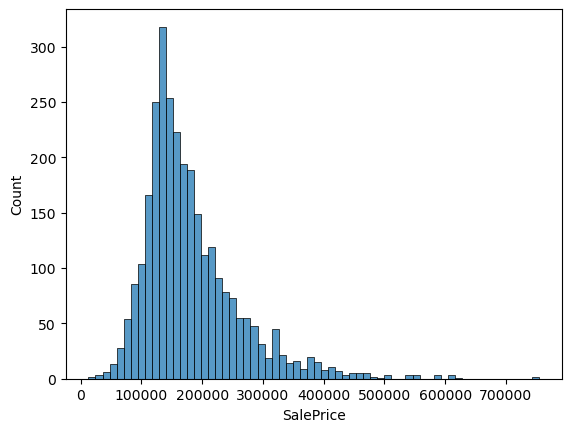

In [43]:
sns.histplot(data=df,x='SalePrice');

In [35]:
# проверяем данные на наличие пропусков

df.isna().sum()

Lot Frontage              0
Lot Area                  0
Overall Qual              0
Overall Cond              0
Year Built                0
                         ..
Sale Condition_AdjLand    0
Sale Condition_Alloca     0
Sale Condition_Family     0
Sale Condition_Normal     0
Sale Condition_Partial    0
Length: 274, dtype: int64

In [36]:
# проверяем данные на наличие строк-дубликатов

df[df.duplicated()]

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial


<hr style="border:1px solid">

## 3. Построение регрессионной модели и оценка ее работы

In [44]:
# Для начала разделим данные на две части - признаки X и целевую переменную y.

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

Разделим и X, и y на обучающий и тестовый наборы данных. Далее будем использовать поиск по сетке, поэтому выделим под тестовые данные 10% от всех данных.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Для оптимальной работы регрессии выполним масштабирование признаков X.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Будем использовать модель "Elastic Net"

In [12]:
from sklearn.linear_model import ElasticNet

In [13]:
model = ElasticNet()

Создаем словарь с набором различных значений параметров для дальнейшего поиска по сетке. 

In [45]:
grid_params = {'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1],'alpha':[0.1,0.2,0.3,0.5,0.7,50,75,95,100]}

С помощью scikit-learn создаем объект GridSearchCV и запускаем поиск по сетке для нахождения наилучших параметров модели

In [18]:
from sklearn.model_selection import GridSearchCV

In [46]:
# передаем параметры модели

grid_model = GridSearchCV(estimator=model, 
                          param_grid=grid_params,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [47]:
# запускаем поиск по сетке и обучаем модель

grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\sch12\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.394e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\sch12\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\sch12\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.324e+11, toleranc

C:\Users\sch12\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.194e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\sch12\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.172e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\sch12\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.272e+11, toleranc

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 50, 75, 95, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9,
                                      1]},
             scoring='neg_mean_squared_error', verbose=1)

In [48]:
# отображаем наилучшую комбинацию параметров для модели

grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

Оцениваем работу модели на тренировочных данных с помощью MAE и RMSE - впоследствии посмотрим, будут ли значимые расхождения в показателях метрик на тренировочном и тестовом наборах, и будет ли проблема переобучения модели

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
y_train_pred = grid_model.predict(scaled_X_train)

In [60]:
MAE_train = mean_absolute_error(y_train, y_train_pred)

In [61]:
MAE_train

13433.533448224847

In [62]:
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

In [63]:
RMSE_train

19745.03432537187

<hr  >

Оцениваем работу модели на тестовом наборе данных с помощью MAE и RMSE

In [50]:
y_pred = grid_model.predict(scaled_X_test)

In [64]:
MAE_test = mean_absolute_error(y_test, y_pred)

In [65]:
MAE_test

14195.354900562168

In [66]:
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))

In [67]:
RMSE_test

20558.508566893157

Посмотрим на разницу в % в показателях метрик на тренировочном и тестовом наборах

In [70]:
(MAE_test / MAE_train * 100 - 100).round(1)

5.7

In [71]:
(RMSE_test / RMSE_train * 100 - 100).round(1)

4.1

### Вывод: Учитывая относительно небольшое расхождение показателей MAE и RMSE между двумя наборами данных, можем считать, что наша модель не переобучена и пригодна для расчета цен домов на новых данных